In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from random import uniform

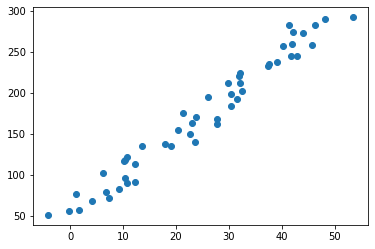

In [2]:
def linear_dataset(count=50, y_intercept=0, slope=1, spread=1.0):
    X = np.array([i+(uniform(-spread, spread)) for i in range(count)])
    y = np.array([y_intercept+i*slope+(uniform(-spread, spread)) for i in range(count)])
    return X, y

data_X, data_y = linear_dataset(50, 50.0, 5, 5)
plt.scatter(data_X, data_y)

100%|████████████████████████████████████| 6666/6666 [00:00<00:00, 41858.21it/s]


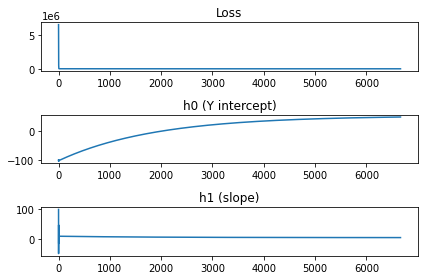

In [5]:
m = len(data_X)

# bad initial values to ensure it corrects itself
h0 = -99 # y intercept
h1 = 99 # slope

n_epochs = 6666
lr = 0.001

h0s = []
h1s = []
losses = []

for i in tqdm(range(n_epochs)):
    
    y_predicted = h1*data_X+h0
    cost = (1/m)*(np.sum((data_y-y_predicted)**2))
    losses.append(cost)
    
    cost_df_dm = (-2/m)*(np.sum((data_y-y_predicted)*data_X))
    cost_df_db = (-2/m)*np.sum((data_y-y_predicted))
     
    h0s.append(h0)
    h0 -= lr*cost_df_db
    
    h1s.append(h1)
    h1 -= lr*cost_df_dm

fig, ax = plt.subplots(3, tight_layout=True)

ax[0].set_title("Loss")
ax[0].plot(losses)

ax[1].set_title("h0 (Y intercept)")
ax[1].plot(h0s)

ax[2].set_title("h1 (slope)")
ax[2].plot(h1s)

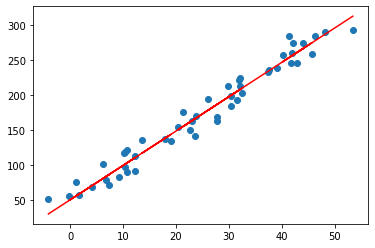

In [6]:
plt.scatter(data_X, data_y)

preds = h1*data_X+h0
plt.plot(data_X, preds, c='r')